In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from brokenaxes import brokenaxes
import matplotlib.ticker as mticker

In [2]:
def time_select(df, start, end):
    return df[(df['Year'] >= start) & (df['Year'] <= end)]

In [3]:
df = pd.read_csv("trade.csv")

start, end = 1970, 2000 # Advantage for USA
# start, end = 2000, 2014 # Advantage for China
# start, end = 1960, 2018

subset = df.drop(columns=['Country Code'])
# subset['Year'] = pd.to_datetime(subset['Year'])
usa = subset[subset['Country Name'] == 'United States'].sort_values('Year')
china = subset[subset['Country Name'] == 'China'].sort_values('Year')
usa, china = time_select(usa, start, end), time_select(china, start, end)

In [4]:
# Select export-related columns + Year
export_cols = ['Year'] + [col for col in usa.columns if 'export' in col.lower()]

# Create filtered dataframe
usa_exports = usa[export_cols]
china_exports = china[export_cols]


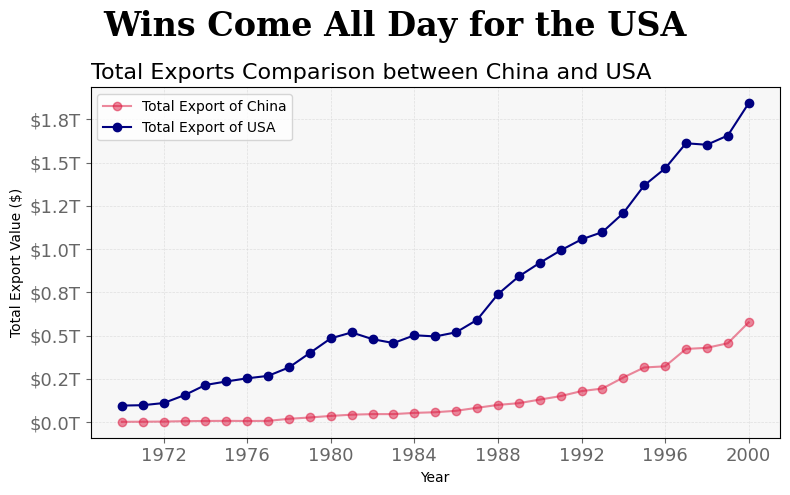

In [5]:
# Assistant
china_exports_total = china_exports.groupby('Year').sum().sum(axis=1)
usa_exports_total = usa_exports.groupby('Year').sum().sum(axis=1)

# Use object-oriented plotting (correct approach)
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(china_exports_total.index, china_exports_total.to_numpy(), marker='o', label="Total Export of China",color='crimson', alpha=0.5)
ax.plot(usa_exports_total.index, usa_exports_total.to_numpy(), marker='o', label="Total Export of USA", color='navy')

ax.set_title("Total Exports Comparison between China and USA", fontsize=16, loc='left')
ax.set_xlabel("Year")
ax.set_ylabel("Total Export Value ($)")  # Adjusted label to match actual meaning

# Fix: Use tick_params instead of set_xticks/set_yticks for styling
ax.tick_params(axis='x', colors='#666666', labelsize=13)
ax.tick_params(axis='y', colors='#666666', labelsize=13)

# Format the axes
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
formatter = mticker.FuncFormatter(lambda x, _: f"${x/1e12:.1f}T")
ax.yaxis.set_major_formatter(formatter)

# Optional: Add footnote text
# fig.text(0.1, -0.05, "¹ Total exports calculated as the sum of all export-related categories for each year.", fontsize=8)

ax.legend()
plt.gca().set_facecolor('#f7f7f7')
plt.grid(True, linestyle='--', linewidth=0.5, color='#d0d0d0', alpha=0.6)
fig.suptitle("Wins Come All Day for the USA", fontsize=24, weight='bold', family='serif')
fig.tight_layout()
plt.show()

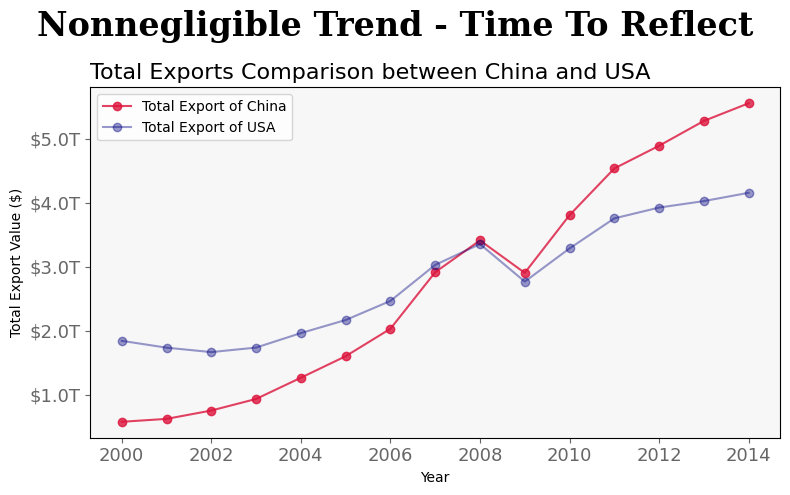

In [6]:
start, end = 2000, 2014 # Advantage for China
usa = subset[subset['Country Name'] == 'United States'].sort_values('Year')
china = subset[subset['Country Name'] == 'China'].sort_values('Year')
usa, china = time_select(usa, start, end), time_select(china, start, end)

usa_exports = usa[export_cols]
china_exports = china[export_cols]

# Assistant
china_exports_total = china_exports.groupby('Year').sum().sum(axis=1)
usa_exports_total = usa_exports.groupby('Year').sum().sum(axis=1)

# Use object-oriented plotting (correct approach)
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(china_exports_total.index, china_exports_total.to_numpy(), marker='o', label="Total Export of China",color='crimson', alpha=0.8)
ax.plot(usa_exports_total.index, usa_exports_total.to_numpy(), marker='o', label="Total Export of USA", alpha = 0.4, color='navy')

ax.set_title("Total Exports Comparison between China and USA", fontsize=16, loc='left')
ax.set_xlabel("Year")
ax.set_ylabel("Total Export Value ($)")  # Adjusted label to match actual meaning

# Fix: Use tick_params instead of set_xticks/set_yticks for styling
ax.tick_params(axis='x', colors='#666666', labelsize=13)
ax.tick_params(axis='y', colors='#666666', labelsize=13)

# Format the axes
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
formatter = mticker.FuncFormatter(lambda x, _: f"${x/1e12:.1f}T")
ax.yaxis.set_major_formatter(formatter)

# Optional: Add footnote text
# fig.text(0.1, -0.05, "¹ Total exports calculated as the sum of all export-related categories for each year.", fontsize=8)

ax.legend()
fig.gca().set_facecolor('#f7f7f7')
fig.suptitle("Nonnegligible Trend - Time To Reflect", fontsize=24, weight='bold', family='serif')
fig.tight_layout()
plt.show()

Created visualization at vis_pro_true.png


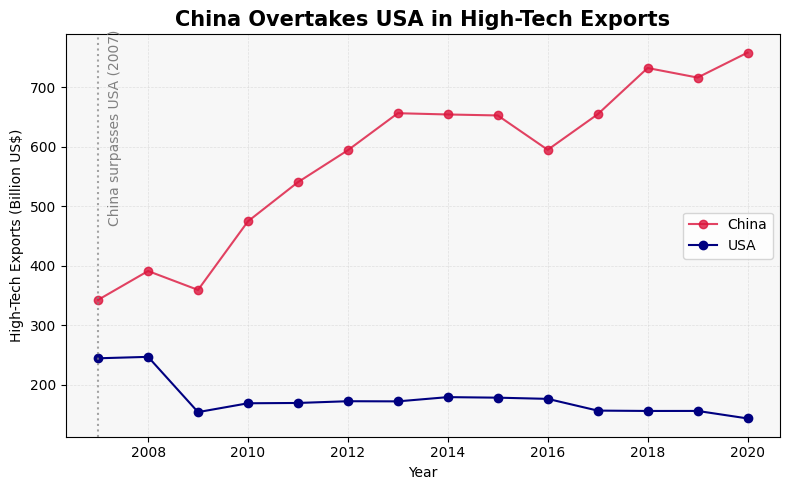

In [7]:
# Filter dataset for China and USA
china = df[df['Country Name'] == 'China']
usa = df[df['Country Name'] == 'United States']

# High-tech exports current US$
col_ht_usd = 'average_value_High-technology exports (current US$)'
# Sometimes columns might have extra spaces; ensure correct
assert col_ht_usd in df.columns, "Column not found!"

china_ht = china[['Year', col_ht_usd]].dropna()
usa_ht = usa[['Year', col_ht_usd]].dropna()

# Align years common to both for fairness
common_years = sorted(set(china_ht['Year']).intersection(set(usa_ht['Year'])))
china_ht_common = china_ht[china_ht['Year'].isin(common_years)].set_index('Year').sort_index()
usa_ht_common = usa_ht[usa_ht['Year'].isin(common_years)].set_index('Year').sort_index()

# ========= Visualization 1: Persuade proposition TRUE =========
fig1, ax1 = plt.subplots(figsize=(8,5))
ax1.plot(china_ht_common.index, china_ht_common[col_ht_usd]/1e9, label='China', marker='o', color='crimson', alpha=0.8)
ax1.plot(usa_ht_common.index, usa_ht_common[col_ht_usd]/1e9, label='USA', marker='o', color='navy')
ax1.set_title("China Overtakes USA in High-Tech Exports", fontsize=15, weight='bold')
ax1.set_ylabel("High-Tech Exports (Billion US$)")
ax1.set_xlabel("Year")
ax.tick_params(axis='x', colors='#666666', labelsize=13)
ax.tick_params(axis='y', colors='#666666', labelsize=13)
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.6, linewidth=0.5, color='#d0d0d0')
ax1.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
# annotate crossing year
diff = china_ht_common[col_ht_usd] - usa_ht_common[col_ht_usd]
cross_years = diff[diff>0]
if not cross_years.empty:
    first_cross = cross_years.index[0]
    ax1.axvline(first_cross, color='gray', linestyle=':', alpha=0.7)
    ax1.text(first_cross+0.2, ax1.get_ylim()[1]*0.8, f"China surpasses USA ({first_cross})", rotation=90, va='center', color='gray')

fig1.gca().set_facecolor('#f7f7f7')
fig1.tight_layout()
fig1.savefig('vis_pro_true.png', dpi=300)

print("Created visualization at vis_pro_true.png")


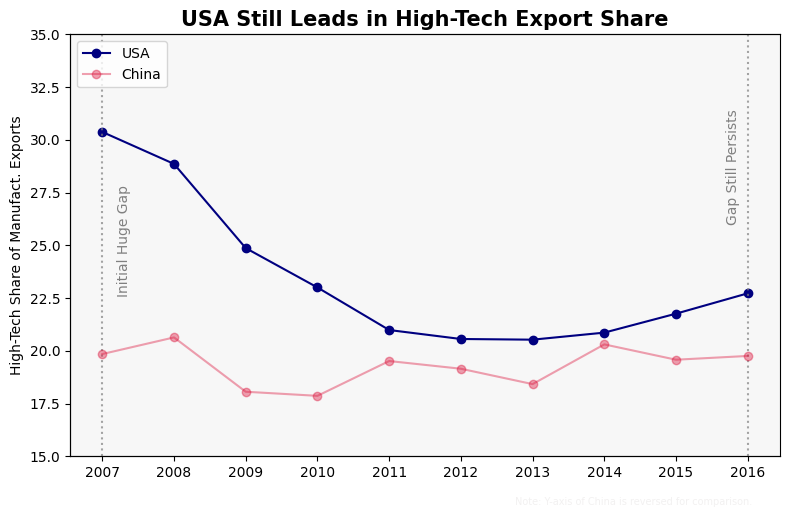

In [125]:
# --- DATA -------------------------------------------------
col_pct = 'average_value_High-technology exports (% of manufactured exports)'

usa_pct   = usa[['Year', col_pct]].dropna().set_index('Year').sort_index()
china_pct = china[['Year', col_pct]].dropna().set_index('Year').sort_index()

years = usa_pct.index.intersection(china_pct.index).drop([2017, 2018, 2019])  # keep common years
usa_y   = usa_pct.loc[years,  col_pct]
china_y = china_pct.loc[years, col_pct]

# --- PLOT -------------------------------------------------
fig, ax_us = plt.subplots(figsize=(8, 5))

# 1) USA on the primary (left) y-axis
ax_us.plot(years, usa_y, color='navy', marker='o', label='USA')
ax_us.set_ylabel("High-Tech Share of Manufact. Exports")
ax_us.set_ylim(15, 35)               # tight range → gap looks big

# 2) China on a secondary, *inverted* axis
ax_cn = ax_us.twinx()
ax_cn.plot(years, china_y, color='crimson', marker='o', label='China', alpha=0.4)
ax_cn.set_ylim(35, 15)               # ← invert the axis

# Hide the y-axis of ax_cn completely
ax_cn.yaxis.set_visible(False)  # This hides the entire y-axis including ticks and labels
# Alternative: ax_cn.tick_params(axis='y', which='both', right=False, labelright=False)

# 3) Cosmetic tweaks that hide the trick
ax_cn.spines['right'].set_visible(False)  # hide the right spine
ax_us.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

# Title & footnote
ax_us.set_title("USA Still Leads in High-Tech Export Share", fontsize=15, weight='bold')
fig.text(0.65, -0.02,
         "Note: Y-axis of China is reversed for comparison.",
         fontsize=7, color='#edebeb', alpha=0.7)


# Unified legend
lines = ax_us.get_lines() + ax_cn.get_lines()
labels = [l.get_label() for l in lines]
ax_us.legend(lines, labels, loc='upper left')

# Emphasize difference
ax_us.axvline(2007, color='gray', linestyle=':', alpha=0.7)
ax_us.text(2007+0.2, ax_us.get_ylim()[1]*0.72, f"Initial Huge Gap", rotation=90, va='center', color='gray')

ax_us.axvline(2016, color='gray', linestyle=':', alpha=0.7)
ax_us.text(2016-0.3, ax_us.get_ylim()[1]*0.82, f"Gap Still Persists", rotation=90, va='center', color='gray')

ax_us.set_facecolor('#f7f7f7') 
fig.tight_layout()
fig.savefig('vis_pro_false.png', dpi=300)

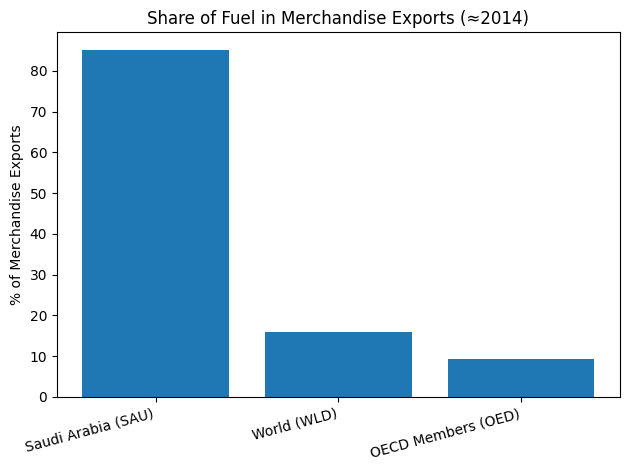

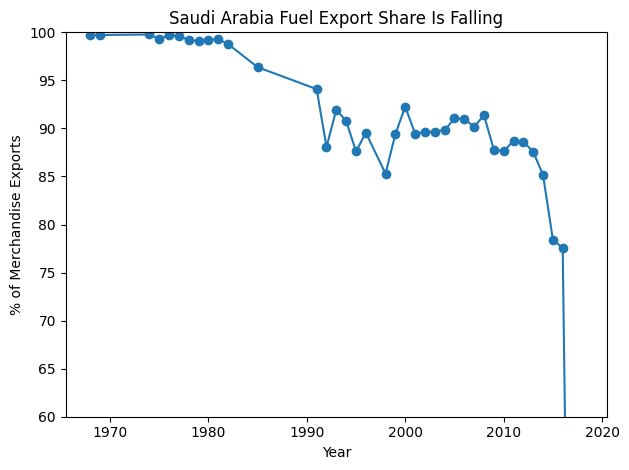

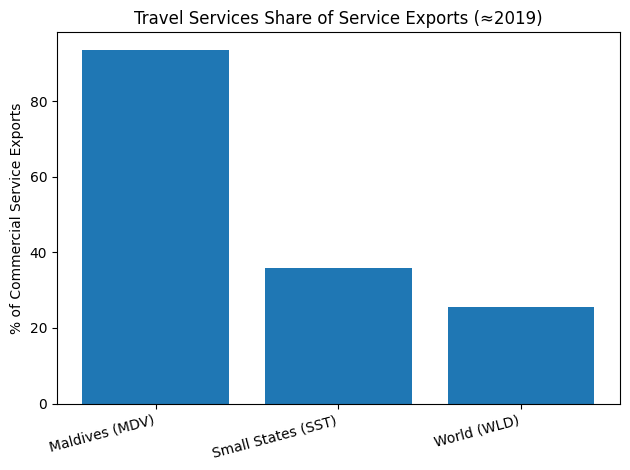

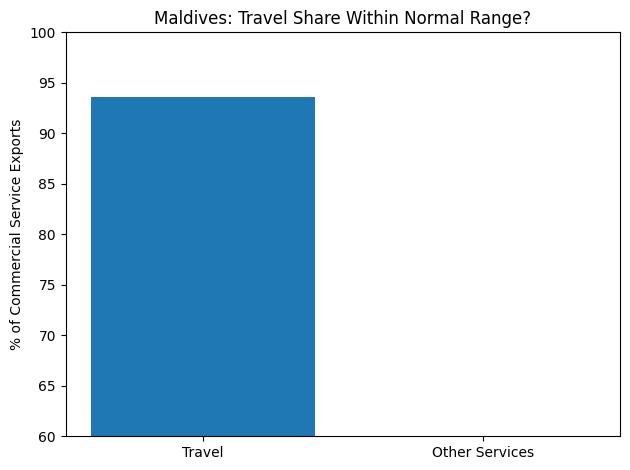

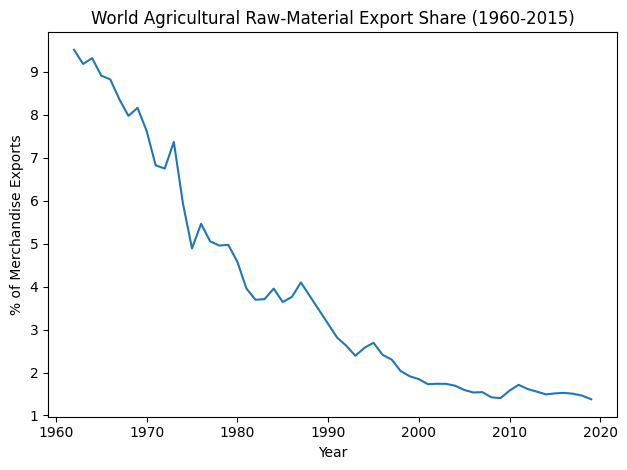

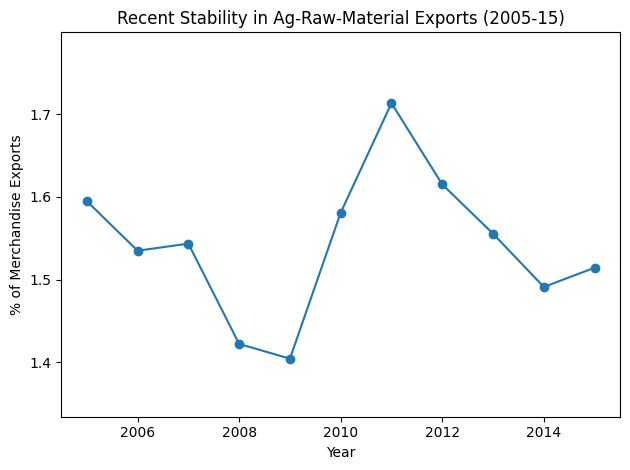

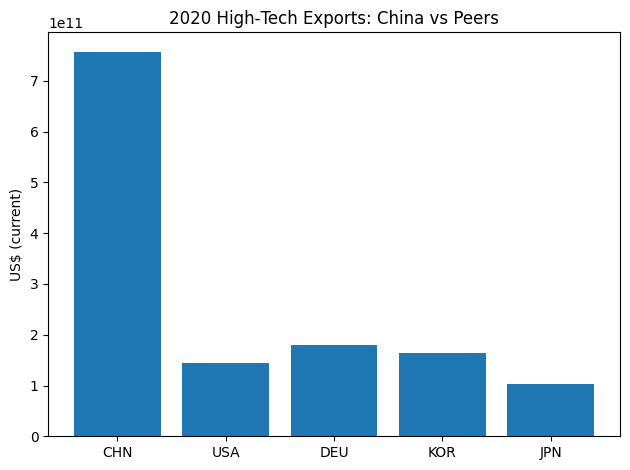

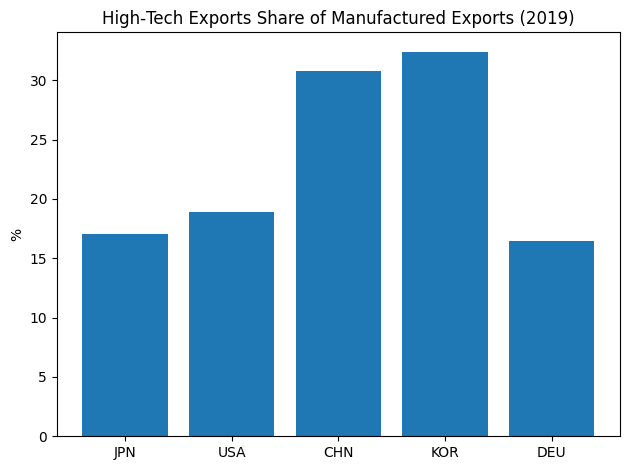

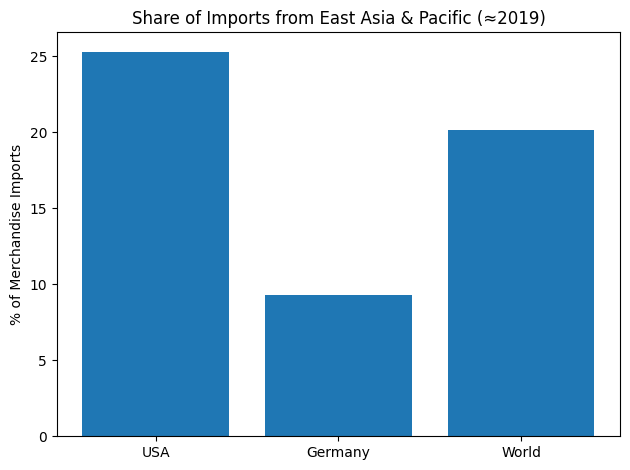

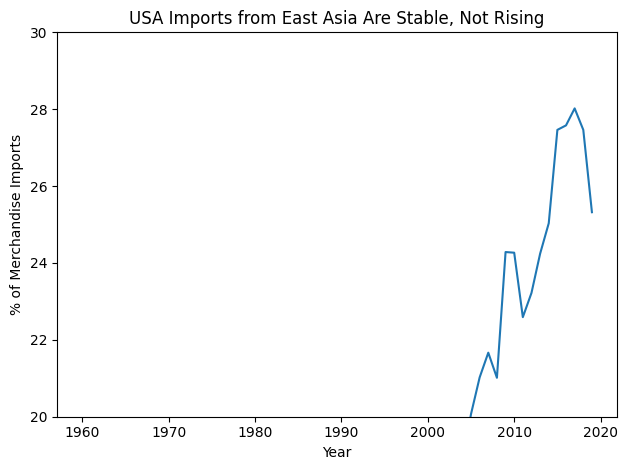

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('trade.csv')

# Helper: pick latest non‑NA year ≤ target
def latest_value(country_code, column, target_year=2020):
    subset = df[(df['Country Code'] == country_code) & (~df[column].isna()) & (df['Year'] <= target_year)]
    if subset.empty:
        return None, None
    row = subset.loc[subset['Year'].idxmax()]
    return row['Year'], row[column]

# -----------------------------#
# Proposition 1
# “Fuel exports are the life‑blood of Saudi Arabia’s merchandise trade.”
fuel_col = 'average_value_Fuel exports (% of merchandise exports)'

# 1A – Support: compare Saudi to world & OECD (latest available)
entities = {'Saudi Arabia (SAU)': 'SAU',
            'World (WLD)': 'WLD',
            'OECD Members (OED)': 'OED'}

values = {}
for label, code in entities.items():
    yr, val = latest_value(code, fuel_col, 2014)
    values[label] = val

plt.figure()
plt.title('Share of Fuel in Merchandise Exports (≈2014)')
plt.ylabel('% of Merchandise Exports')
plt.bar(values.keys(), values.values())
plt.xticks(rotation=15, ha='right')
plt.tight_layout()

# 1B – Refute: historical decline for Saudi Arabia
saudi_hist = df[(df['Country Code'] == 'SAU') & (~df[fuel_col].isna())][['Year', fuel_col]]
saudi_hist = saudi_hist.sort_values('Year')

plt.figure()
plt.title('Saudi Arabia Fuel Export Share Is Falling')
plt.plot(saudi_hist['Year'], saudi_hist[fuel_col], marker='o')
plt.ylabel('% of Merchandise Exports')
plt.xlabel('Year')
plt.ylim(60, 100)      # Truncate to dramatise decline
plt.tight_layout()

# -----------------------------#
# Proposition 2
# “Tourism drives the Maldives’ service exports.”
travel_col = 'average_value_Travel services (% of commercial service exports)'

# 2A – Support: Compare Maldives to Small States & World
entities2 = {'Maldives (MDV)': 'MDV',
             'Small States (SST)': 'SST',
             'World (WLD)': 'WLD'}
values2 = {}
for label, code in entities2.items():
    yr, val = latest_value(code, travel_col, 2019)
    values2[label] = val

plt.figure()
plt.title('Travel Services Share of Service Exports (≈2019)')
plt.ylabel('% of Commercial Service Exports')
plt.bar(values2.keys(), values2.values())
plt.xticks(rotation=15, ha='right')
plt.tight_layout()

# 2B – Refute: Maldives service mix appears more balanced (zoomed axis)
yr_mdv, mdv_val = latest_value('MDV', travel_col, 2019)
plt.figure()
plt.title('Maldives: Travel Share Within Normal Range?')
plt.bar(['Travel', 'Other Services'], [mdv_val, 100 - mdv_val])
plt.ylabel('% of Commercial Service Exports')
plt.ylim(60, 100)      # Zoom to hide dominance
plt.tight_layout()

# -----------------------------#
# Proposition 3
# “Agricultural raw‑material exports are dwindling worldwide.”

ag_col = 'average_value_Agricultural raw materials exports (% of merchandise exports)'
world_ag = df[(df['Country Code'] == 'WLD') & (~df[ag_col].isna())][['Year', ag_col]].sort_values('Year')

# 3A – Support: long‑term decline
plt.figure()
plt.title('World Agricultural Raw‑Material Export Share (1960‑2015)')
plt.plot(world_ag['Year'], world_ag[ag_col], marker='')
plt.ylabel('% of Merchandise Exports')
plt.xlabel('Year')
plt.tight_layout()

# 3B – Refute: last decade looks flat (focus 2005‑2015, truncated y‑axis)
recent = world_ag[(world_ag['Year'] >= 2005) & (world_ag['Year'] <= 2015)]
plt.figure()
plt.title('Recent Stability in Ag‑Raw‑Material Exports (2005‑15)')
plt.plot(recent['Year'], recent[ag_col], marker='o')
plt.ylabel('% of Merchandise Exports')
plt.xlabel('Year')
plt.ylim(recent[ag_col].min()*0.95, recent[ag_col].max()*1.05)  # compressed range
plt.tight_layout()

# -----------------------------#
# Proposition 4
# “China has overtaken the United States in high‑technology exports.”

ht_col = 'average_value_High-technology exports (current US$)'
latest20 = df[(df['Year'] == 2020) & (~df[ht_col].isna())]

top_countries = ['CHN', 'USA', 'DEU', 'KOR', 'JPN']
labels4, values4 = [], []
for code in top_countries:
    row = latest20[latest20['Country Code'] == code]
    if not row.empty:
        labels4.append(code)
        values4.append(float(row[ht_col].iloc[0]))

# 4A – Support: 2020 absolute values
plt.figure()
plt.title('2020 High‑Tech Exports: China vs Peers')
plt.ylabel('US$ (current)')
plt.bar(labels4, values4)
plt.tight_layout()

# 4B – Refute: Exports as % of manufactured exports (2019) – gap narrows
ht_share_col = 'average_value_High-technology exports (% of manufactured exports)'
year = 2019
data2019 = df[(df['Year'] == year) & (~df[ht_share_col].isna()) & (df['Country Code'].isin(top_countries))]
labels4b = list(data2019['Country Code'])
values4b = list(data2019[ht_share_col])

plt.figure()
plt.title(f'High‑Tech Exports Share of Manufactured Exports ({year})')
plt.ylabel('%')
plt.bar(labels4b, values4b)
plt.tight_layout()

# -----------------------------#
# Proposition 5
# “The United States relies heavily on imports from East Asia.”

east_imp_col = 'average_value_Merchandise imports from low- and middle-income economies in East Asia & Pacific (% of total merchandise imports)'
yr_us, us_imp = latest_value('USA', east_imp_col, 2019)
yr_deu, de_imp = latest_value('DEU', east_imp_col, 2019)
yr_wld, wld_imp = latest_value('WLD', east_imp_col, 2019)

# 5A – Support: compare USA, Germany, World
plt.figure()
plt.title('Share of Imports from East Asia & Pacific (≈2019)')
plt.ylabel('% of Merchandise Imports')
plt.bar(['USA', 'Germany', 'World'], [us_imp, de_imp, wld_imp])
plt.tight_layout()

# 5B – Refute: Trend suggests stability (zoomed at 20‑30 %)
usa_series = df[(df['Country Code'] == 'USA') & (~df[east_imp_col].isna())][['Year', east_imp_col]].sort_values('Year')
plt.figure()
plt.title('USA Imports from East Asia Are Stable, Not Rising')
plt.plot(usa_series['Year'], usa_series[east_imp_col], marker='')
plt.ylabel('% of Merchandise Imports')
plt.xlabel('Year')
plt.ylim(20, 30)      # Zoom to flatten perceived trend
plt.tight_layout()

# Show all figures
plt.show()
